# Aufgabe 3.2: Kleinste-Quadrate Trainings- vs. Test-Fehler

Wir betrachten nun erneut die Daten des Regressionsproblems von [Seminar 2](s02.ipynb) Aufgabe 1 aber jetzt mit zwei weiteren Datenpunkt als Test-Daten.

<table>
<thead>
  <tr>
    <th></th>
    <th colspan="4">Training</th>
    <th colspan="2">Test</th>
  </tr>
</thead>
<tbody>
  <tr>
    <td>x in [m]</td>
    <td>-2</td>
    <td>-1</td>
    <td>1</td>
    <td>2</td>
    <td>0</td>
    <td>1.5</td>
  </tr>
  <tr>
    <td>y in [Pa]</td>
    <td>26</td>
    <td>0</td>
    <td>8</td>
    <td>-10</td>
    <td>5</td>
    <td>3</td>
  </tr>
</tbody>
</table>

Im [Seminar 2](s02.ipynb) haben wir auf den Trainingsdaten mit der linearen Kleinste-Quadrate-Methode (u.a.) zwei Modelle berechnet:
- $p_1(x) = 6 - 2.25 x^3 + 6.25 \sin(\frac\pi2 x)$
- $p_1(x) = 4 - 2.25 x^3 + 6.25 \sin(\frac\pi2 x) - 4 \cos(\frac\pi2 x)$.

Berechnen Sie für beide Modelle zu obigen Daten den Kleinste-Quadrate-Fehler auf den
1. Trainingsdaten
2. Test-Daten und
3. Gesamt-Daten.
Was stellen Sie fest?

In [1]:
import numpy as np
import matplotlib.pyplot as plt
np.set_printoptions(precision=4, suppress=True)

x_train = np.array([-2, -1, 1, 2])
y_train = np.array([26, 0, 8, -10])

x_test = np.array([0, 1.5])
y_test = np.array([5, 3])

def p1(x):
    return 6 - 2.25 * x**3 + 6.25 * np.sin(np.pi / 2 * x)

def p2(x):
    return 4 - 2.25 * x**3 + 6.25 * np.sin(np.pi / 2 * x) - 4 * np.cos(np.pi / 2 * x)

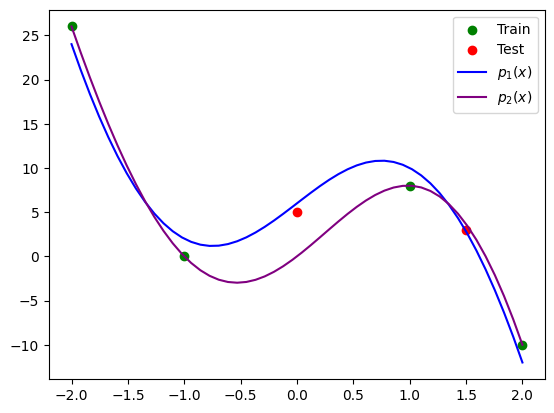

In [2]:
plt.scatter(x_train, y_train, color='green', label='Train')
plt.scatter(x_test, y_test, color='red', label='Test')

x_plot = np.linspace(x_train[0], x_train[-1])
plt.plot(x_plot, p1(x_plot), color='blue', label='$p_1(x)$')
plt.plot(x_plot, p2(x_plot), color='purple', label='$p_2(x)$')

plt.legend()
plt.show()

In [3]:
x_ges = np.concatenate((x_train, x_test))
y_ges = np.concatenate((y_train, y_test))

## $p_1(x) = 6 - 2.25 x^3 + 6.25 \sin(\frac\pi2 x)$

In [4]:
X1_ges = np.vstack([
    np.ones(len(x_ges)),
    x_ges**3,
    np.sin(np.pi / 2 * x_ges)]).T
print(X1_ges)

X1_train = X1_ges[:len(x_train), :]
X1_test = X1_ges[len(x_train):, :]

[[ 1.     -8.     -0.    ]
 [ 1.     -1.     -1.    ]
 [ 1.      1.      1.    ]
 [ 1.      8.      0.    ]
 [ 1.      0.      0.    ]
 [ 1.      3.375   0.7071]]


In [5]:
W1 = np.array([6, -2.25, 6.25])

err1_train = np.linalg.norm(y_train - X1_train @ W1) ** 2
err1_test = np.linalg.norm(y_test - X1_test @ W1) ** 2

print('err1_train =', round(err1_train, 4))
print('err1_test  =', round(err1_test, 4))

err1_train = 16.0
err1_test  = 1.0304


## $p_1(x) = 4 - 2.25 x^3 + 6.25 \sin(\frac\pi2 x) - 4 \cos(\frac\pi2 x)$

In [6]:
X2_ges = np.vstack([
    np.ones(len(x_ges)),
    x_ges**3,
    np.sin(np.pi / 2 * x_ges),
    np.cos(np.pi / 2 * x_ges)]).T
print(X2_ges)

X2_train = X2_ges[:len(x_train), :]
X2_test = X2_ges[len(x_train):, :]

[[ 1.     -8.     -0.     -1.    ]
 [ 1.     -1.     -1.      0.    ]
 [ 1.      1.      1.      0.    ]
 [ 1.      8.      0.     -1.    ]
 [ 1.      0.      0.      1.    ]
 [ 1.      3.375   0.7071 -0.7071]]


In [7]:
W2 = np.array([4, -2.25, 6.25, -4])

err2_train = np.linalg.norm(y_train - X2_train @ W2) ** 2
err2_test = np.linalg.norm(y_test - X2_test @ W2) ** 2

print('err2_train =', round(err2_train, 4))
print('err2_test  =', round(err2_test, 4))

err2_train = 0.0
err2_test  = 25.4278
